# 7강 Train NN 2

1. 더 멋진 최적화
2. 정규화
3. 전이 학습

### SGD의 문제점

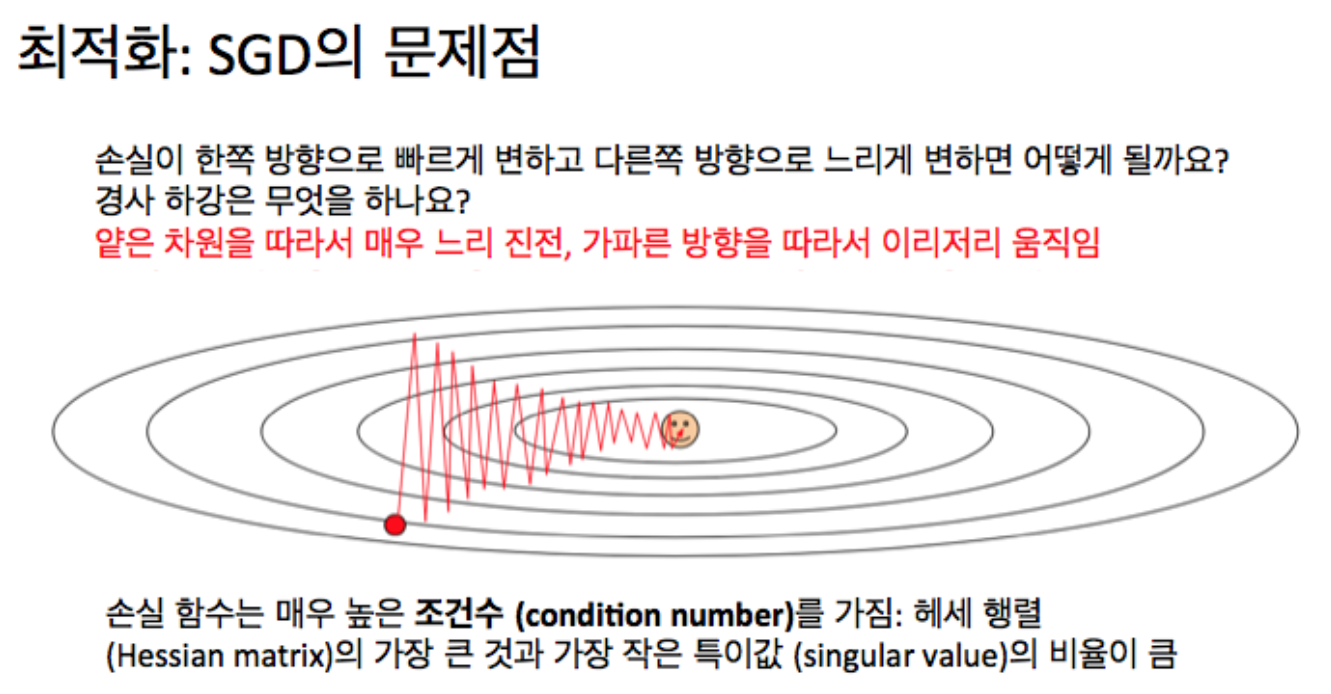

위의 그림읇 봤을 때 손실이 수직적 방향 변화에는 민감하게 반응하지만 해피포인트 방향으로 가는 것엔 민감하지 않음. 

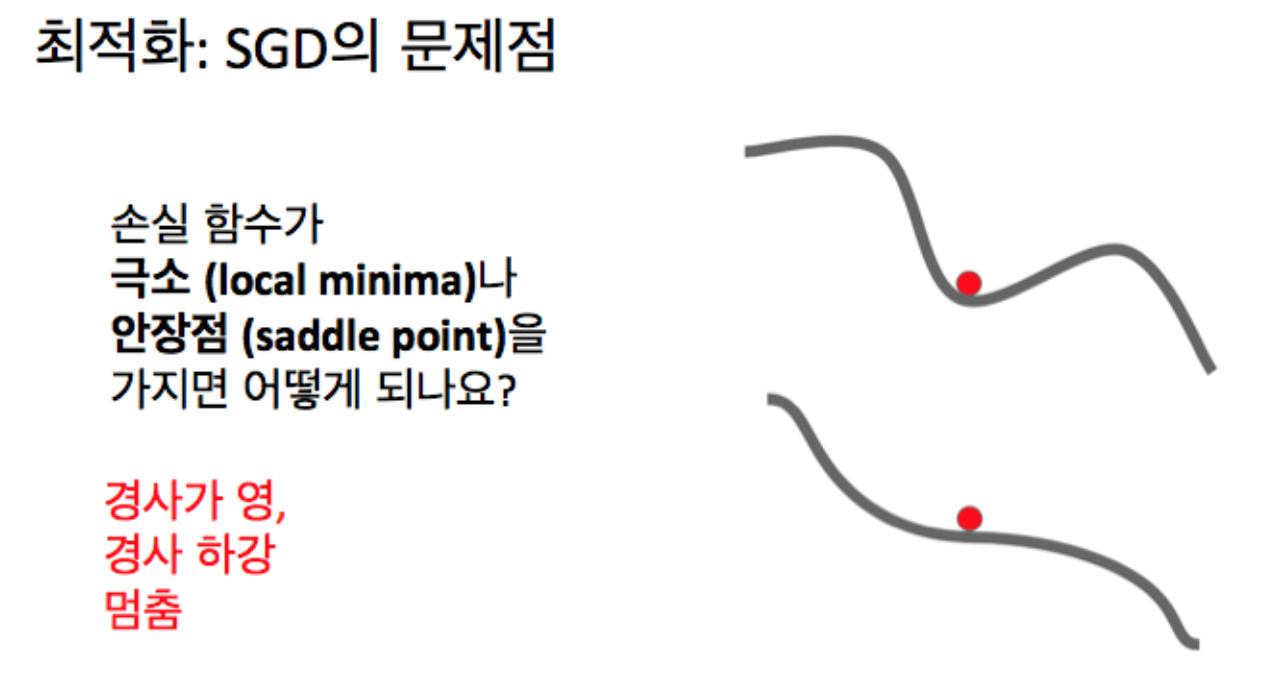

높은 차원으로 갈수록 안장점 문제 많음 + 안장 지점 '근처'에서도 매우 느리게 진행된다는 문제가 있음

이러한 SGD를 구원해줄 친구가 있다.  
그것은 바로바로 모멘텀  
모멘텀은 시간에 따른 속도를 유지하고, 속도에 경사 추정값을 더한다. 그다음 경사의 방향으로 걸어가는 것이 아니라 속도의 방향으로 간다. 

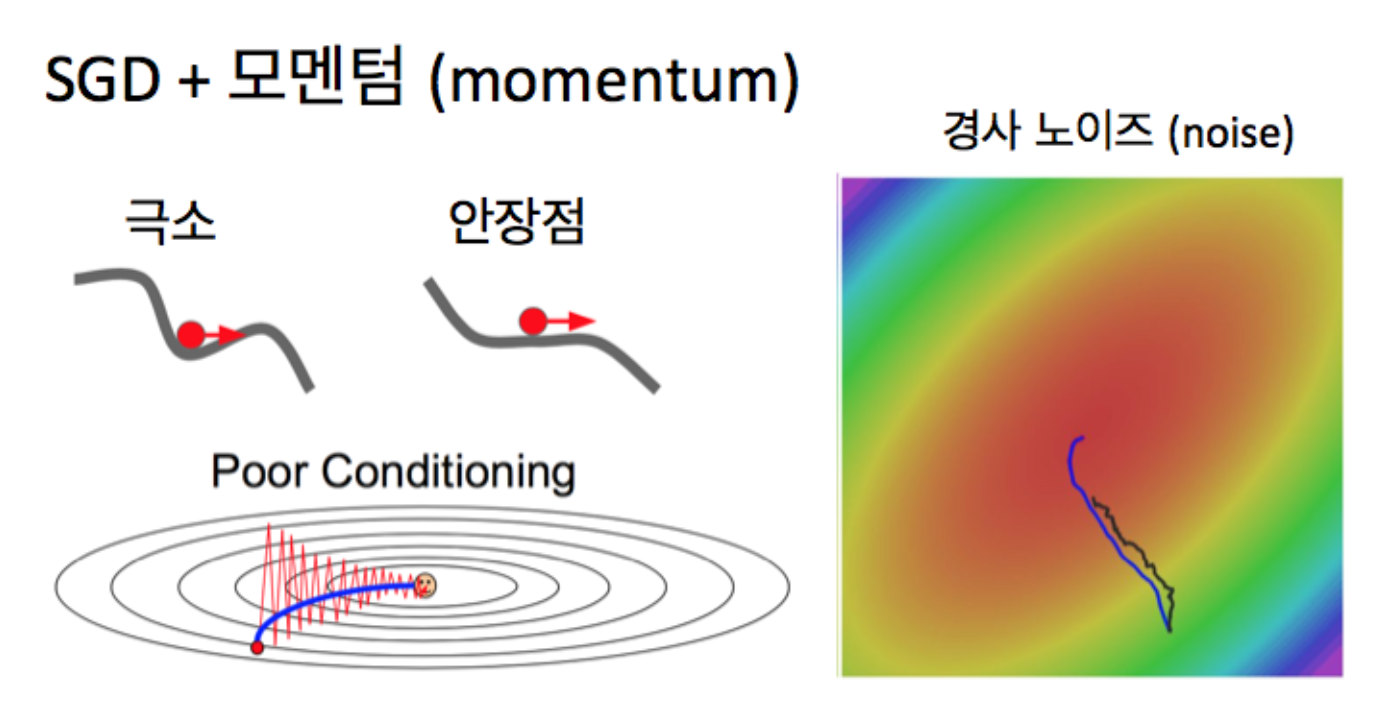

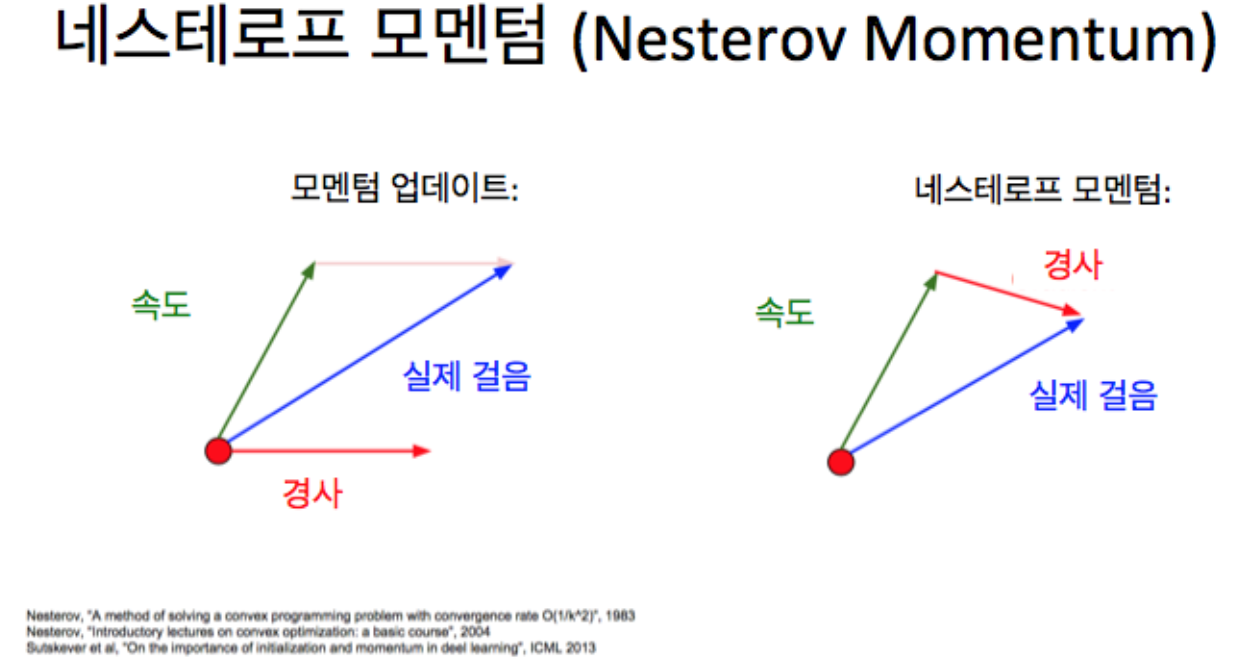

네스테로프 모멘텀은 속도가 가르키는 방향으로 먼저 가고 그 다음에 경사를 평가 한 후 원점으로 돌아가서 그 둘을 섞음

**네스테로프 모멘텀**   
$v_{t+1} = \rho v_t - \alpha \nabla f(x_t + \rho v_t)$  
$x_{t+1} = x_t + v_{t+1}$

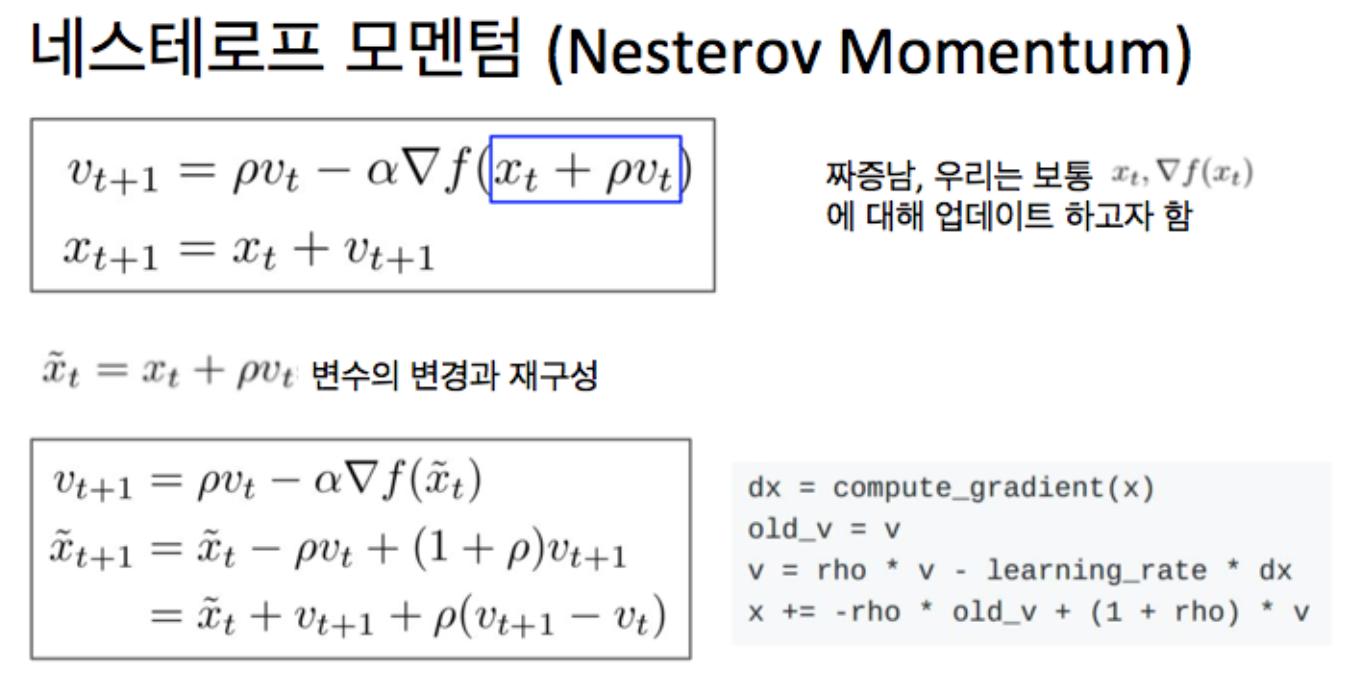

여기서 짜증나는? 점이 있는데  
우리는 속도와 경사를 같은 지점에서 평가하고 싶어하는데 네스테로프 모멘텀 특이 그렇지 않음  
그래서 위의 그림처럼 변수를 약간 변경해줌  
-> 해석상 이점이 있음

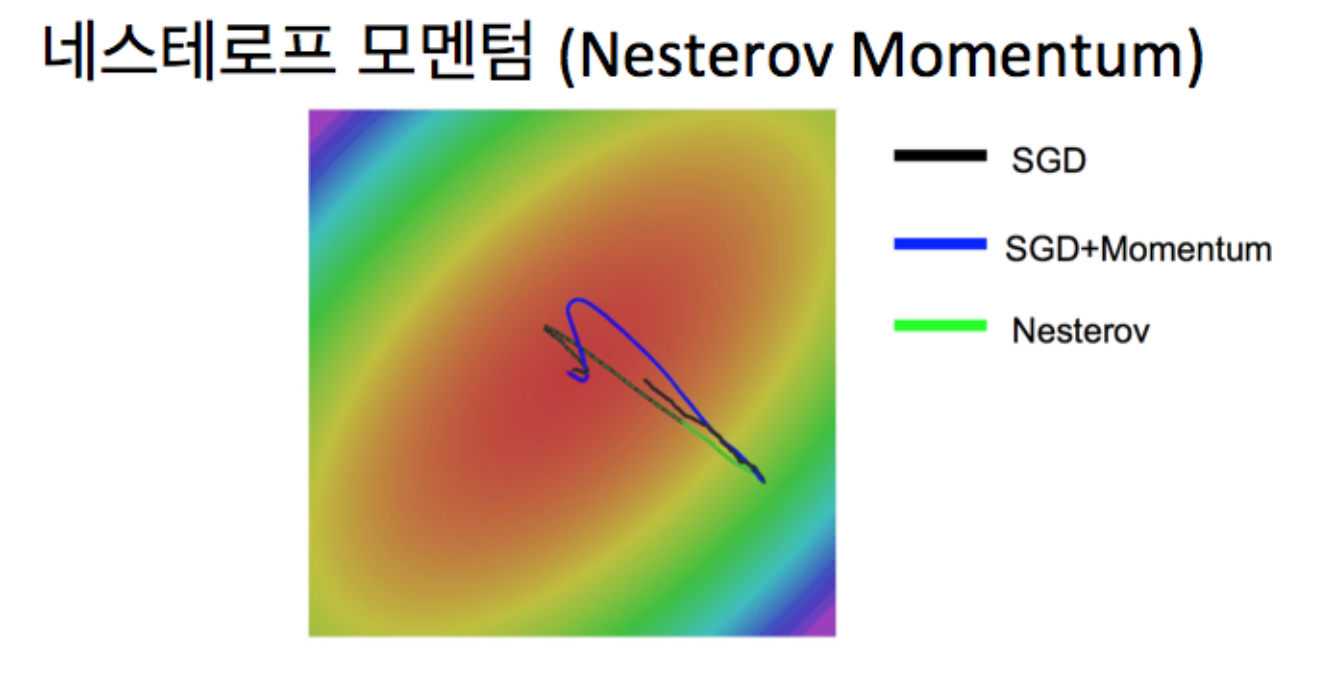

#### AdaGrad

이 아이디어는 최적화 과정 동안 모든 경사 제곱에 대해 이동 추정을 하거나 이동 합을 구함.  
속도가 아닌 그래드 스퀘어드?를 가짐

In [ ]:
grad_squared = 0
while True:
  dx = compute_gradient(x)
  grad_squared += dx*dx
  x -= learning_rate*dx / (np.sqrt(grad_squared) + 1e-7)#1e-7은 0으로 나누는 것을 방지

AdaGrad는 학습과정을 거치면서 Step size t가 점점 작이지는데 이는 오히려 좋음  
목표지점에 가까워 질 수록 천천히 제대로 접근해서 수혐해야하기 때문임.

RMSProp: 아다그래드 약간 번형  
Adam: AdaGrad와 RMSProp 합성;

제일 좋은 학습률은?

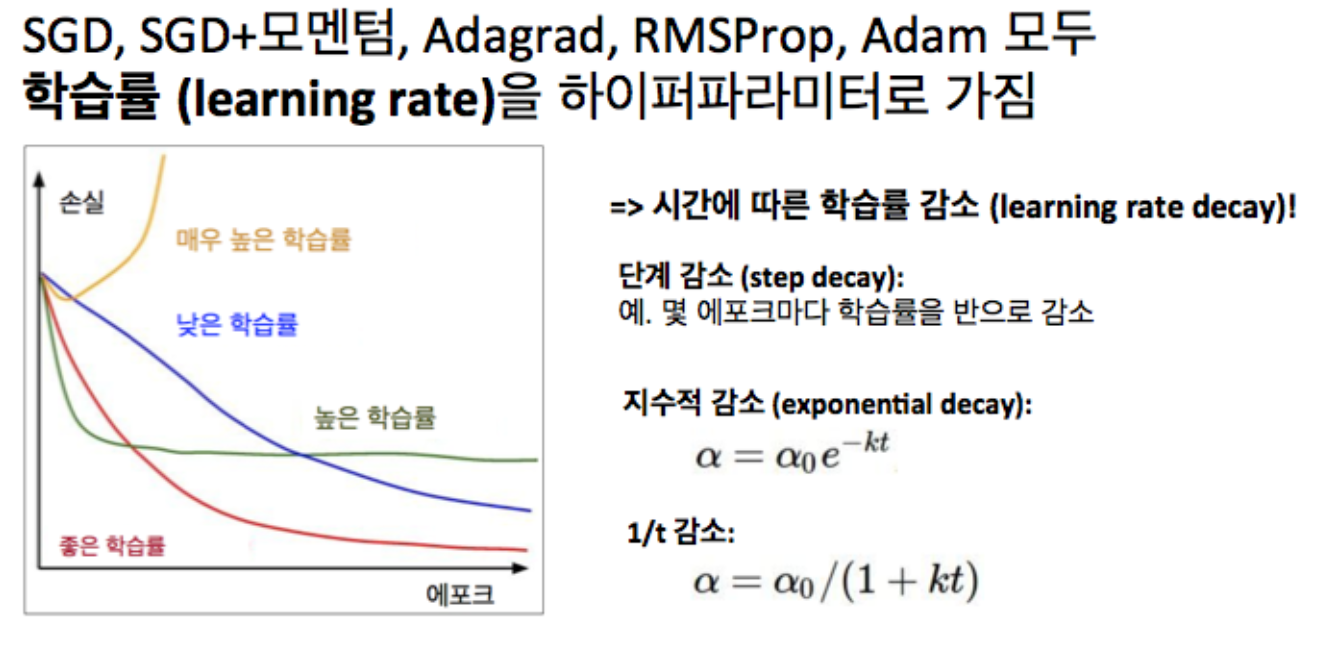

그래프 상엔 없고 decay 시키는 것이 짱임  

여태까지 배운 것들이 1st order optimization이고

Second order optimization은 해시안을 통해 경사뿐만이 아니라 이 곡면이 어떻게 구성되어 있는지 알 수 있어 굳이 학습할 필요없이 최저점으로 바로 갈 수 있음
-> 러닝레이트도 필요 없음
장점: conversions 빨라지고 러닝레이트같은 파라미터 필요 x 
단점: 딥한 딥러닝에서는 현실적으로 사용이 불가능함. 큰 by 큰을 역행렬까지 갖춰야함

### 모델 앙상블  
과적합을 약간 줄여주고 성능을 평균적으로 2% 개선해줌  


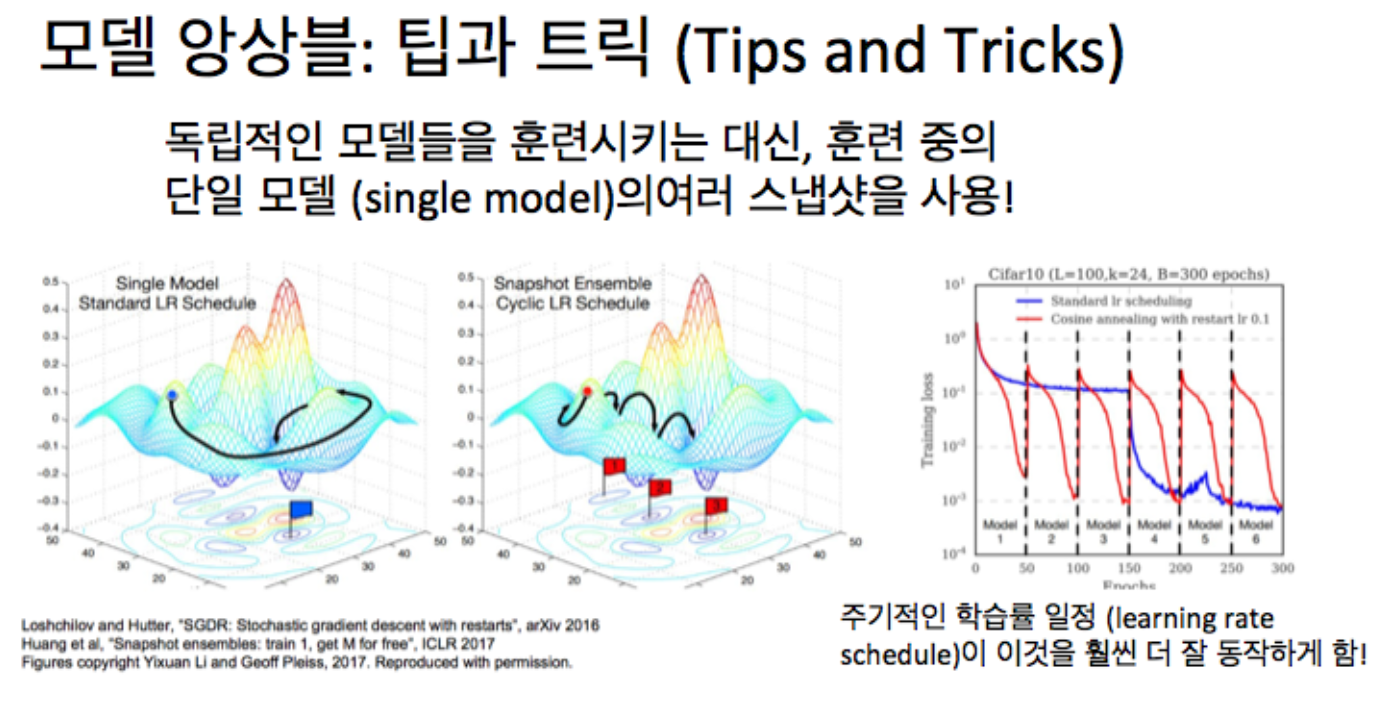

체크포인트간의 혹은 파라미터간의 앙상블만 해도 성능이 향상된다 -> 성능이 향상되는 이유: step 사이즈가 클 때 지나치는 게 너무 많으니 이걸 평균화시키면 그 공백을 메꿀 수 있다.


### 정규화

단일 모델일 때 성능 개선을 할 수 있고 과적합을 방지하는 아주 좋은 녀석

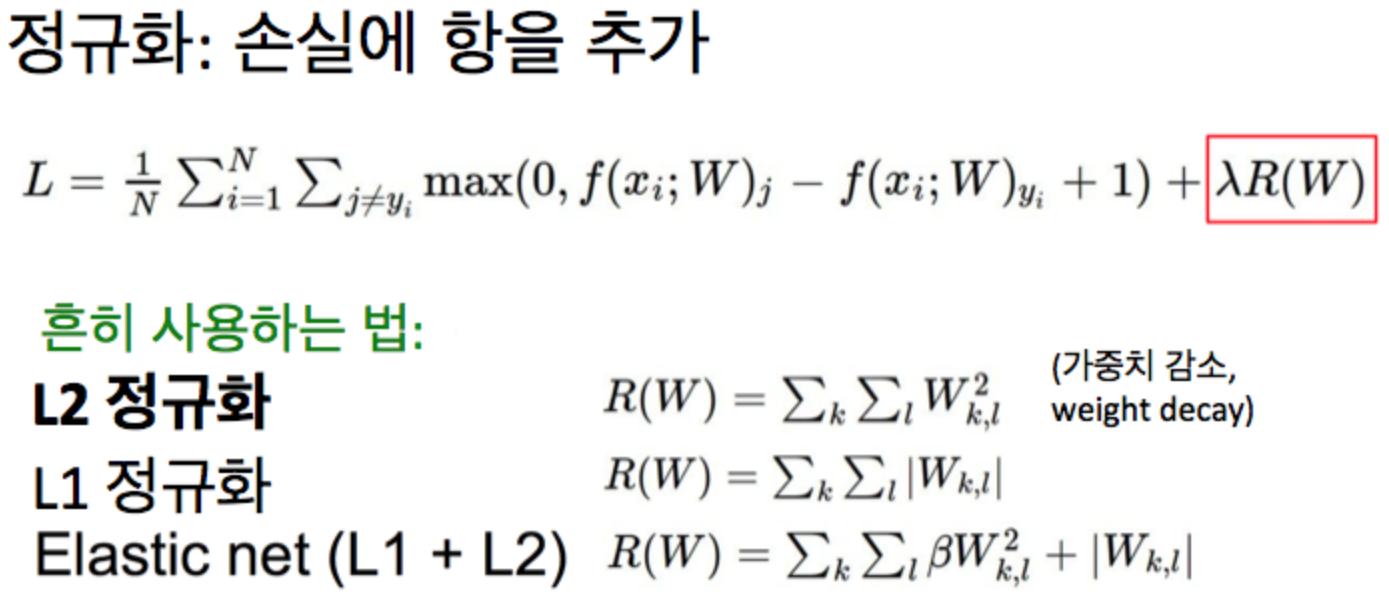

이전에 배운 위의 것들은 꺼지시고..  
드랍아웃 가보자!  
dropout은 최고임 그러나 최근에 배치노말라이제이션 사용시 안쓰긴 하나 이해를 잘 해두면 좋음. + drop connect도 있음

drop 아웃이 좋은 이유: 꼬리를 보고 있던 노드가 dropout된 귀나 털 같은 노드들을 관측하려고 노력.

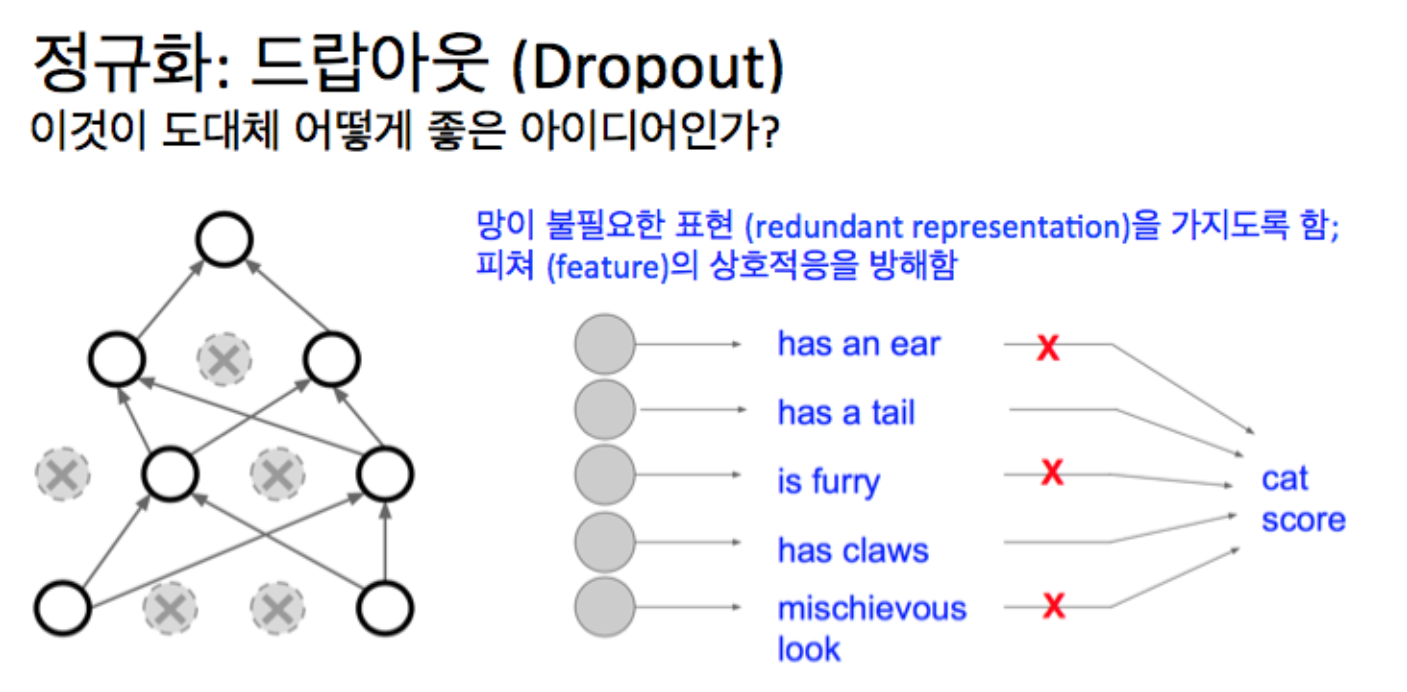

test time 때는 dropout을 사용하지 않아야 좋은 결과를 얻음   
test time 때 train때의 '기대치'만큼 스케일링 해줘야함 '*p'  

Inverted dropout을 현실적으로 사용하는데 p를 test에서 안곱해주지만 train에서 미리 p를 나눠줌.

### 데이터 증강

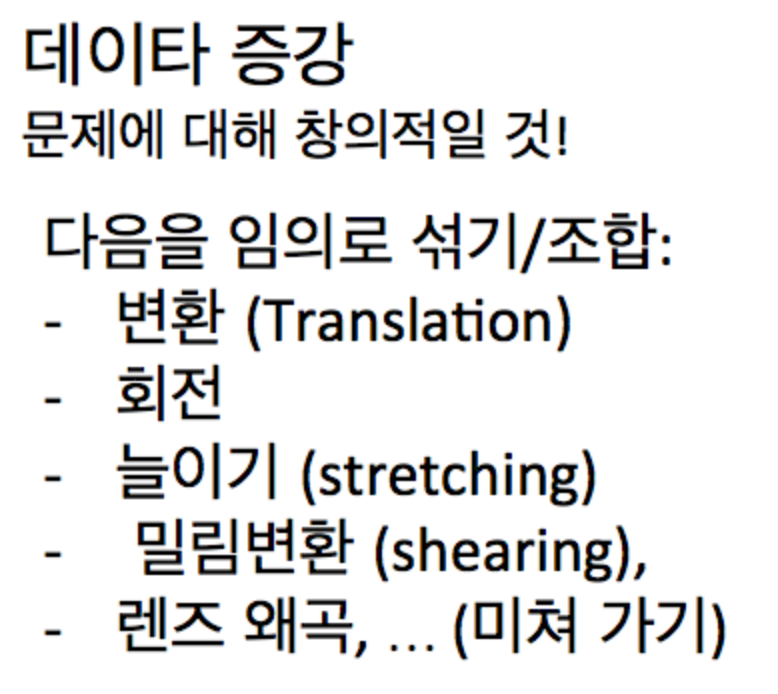

위의 방법들을 쓰면 다양성이 올라가고 테스트시에 떨어지기 때문에 항상 사용가능

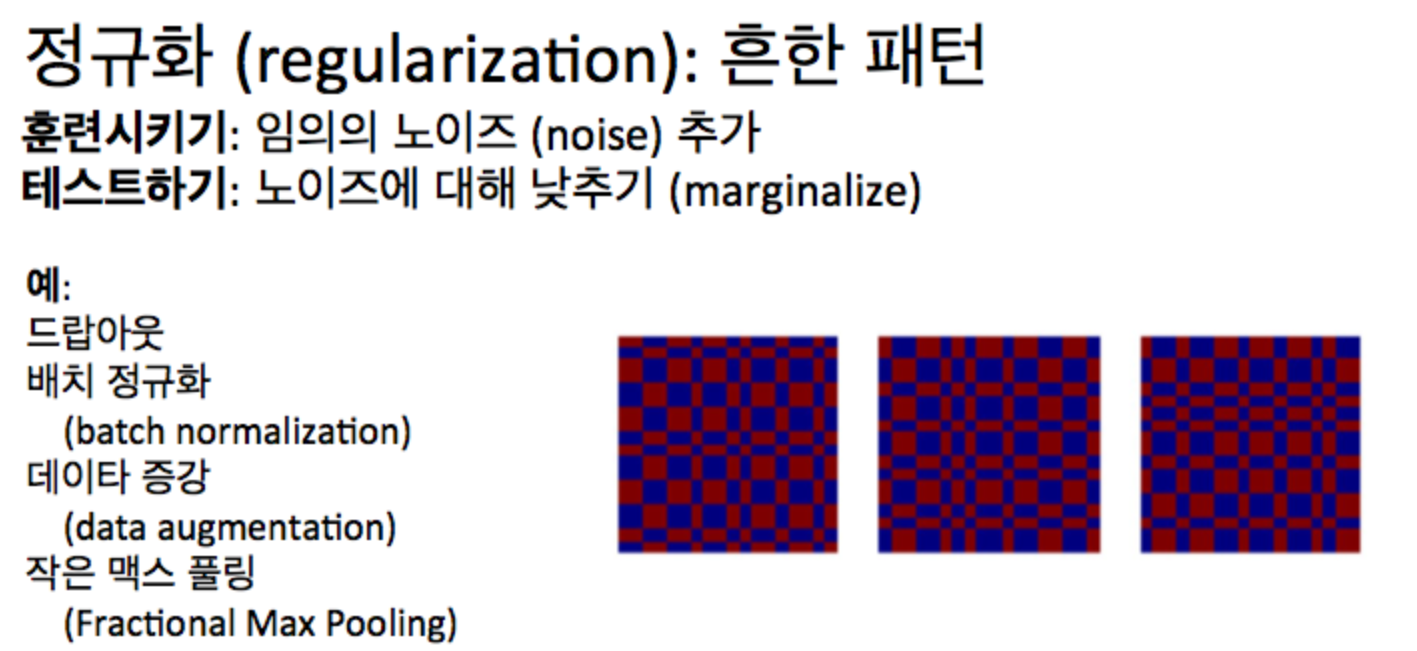

작은 맥스 풀링 (강의자가 좋아함)  
내가 이해하는 바로는 2x2 풀링할 때 몇개는 뺀다는 말 같음  
확률적 깊이라는 것도 나오는데  
층이 많은 망이 있을 때 임의로 계층을 드랍하는 것.  

### 전이 학습 (Transfer Learning)

CNN을 훈련하는데 많은 데이터가 필요한 것을  이미 훈련된 CNN을 가져와서 훈련시키는 것. 

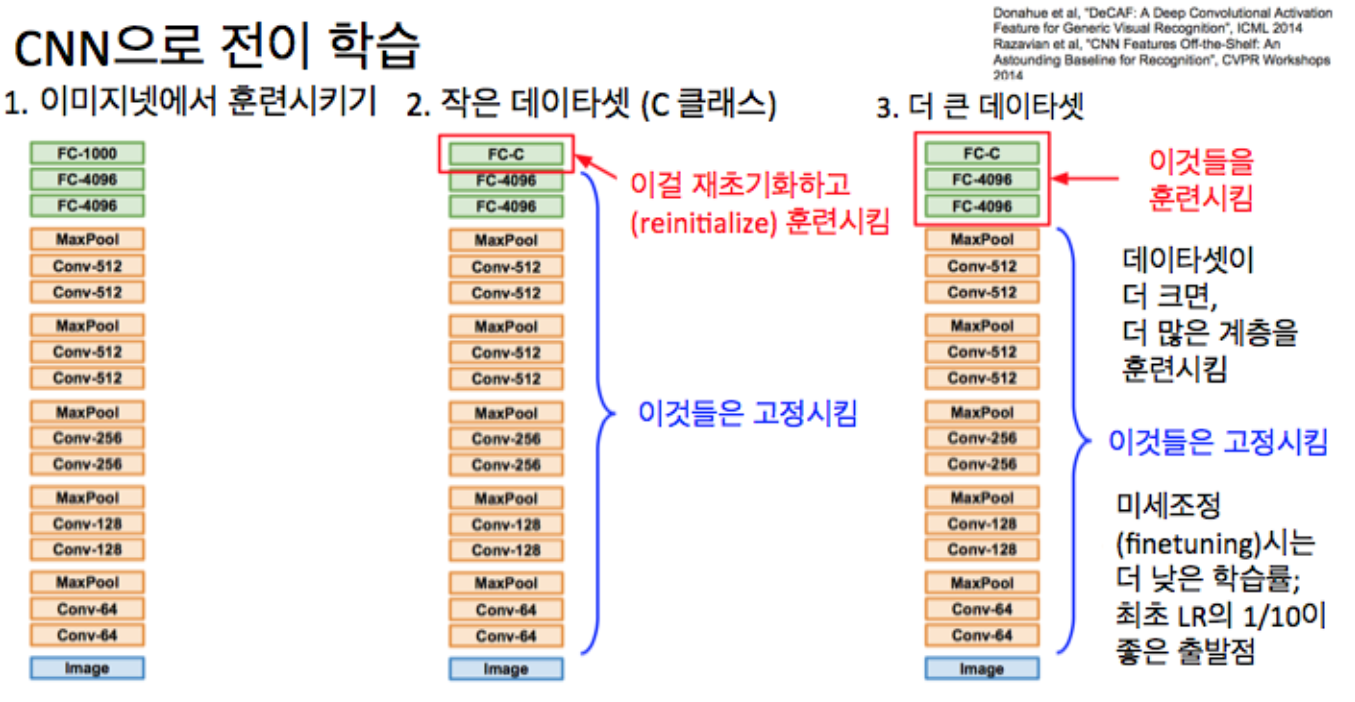

데이터가 진짜 없으면 맨 마지막 계층만 현재 갖고 있는 데이터로 하고 나머진 원래 있던 걸로 대체  
그래도 좀 있으면 FC계층 전까지만 transfer learning 적용

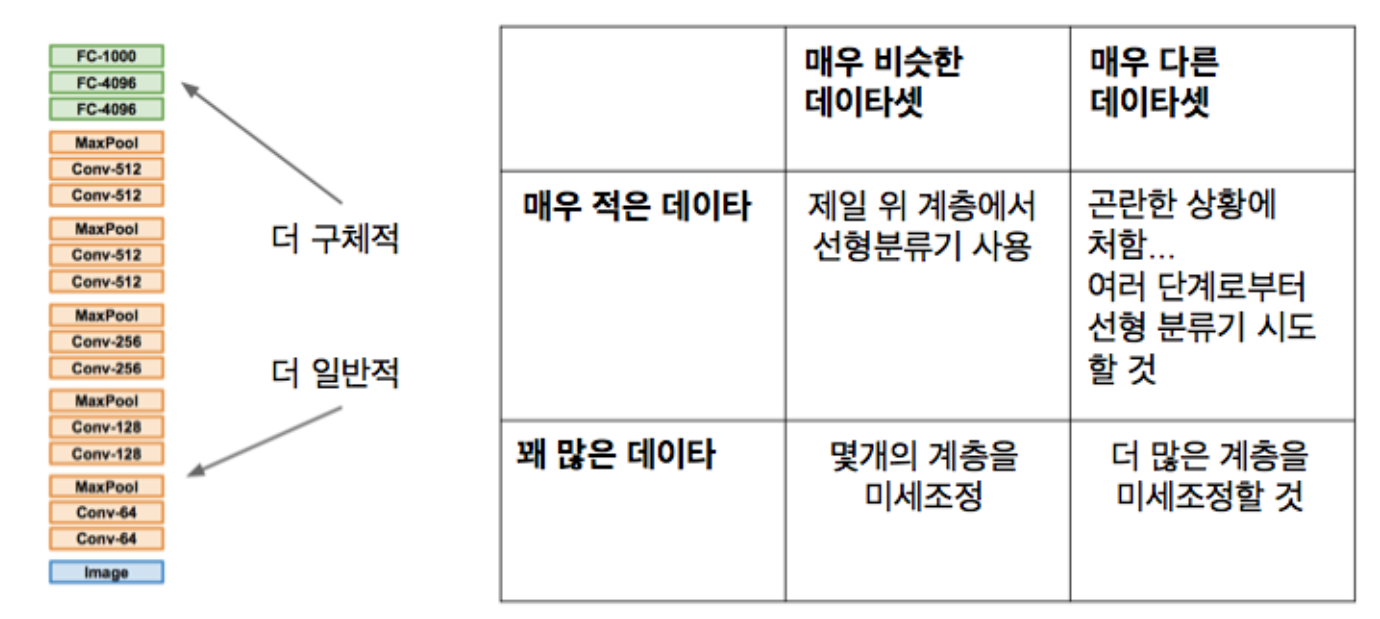

전이 학습은 표준이니 쓰거라.  
쓰고 미세조정해라